# Importing Libraries and Data

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, Lars, LassoLars
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.dummy import DummyRegressor
import xgboost as xgb
import lightgbm as lgb

from catboost import CatBoostRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_error as root_mean_squared_error
%run datathon_methods.ipynb

In [2]:
train_data=pd.read_csv(r"C:\Users\Naz\Desktop\Datathon\data\train.csv",low_memory=False)
test_data = pd.read_csv(r"C:\Users\Naz\Desktop\Datathon\data\test_x.csv")

In [3]:
#pip install xgboost

In [4]:
#pip install lightgbm

In [5]:
#pip install catboost

# Analyzing Data

In [6]:
train_data.columns

Index(['Basvuru Yili', 'Degerlendirme Puani', 'Cinsiyet', 'Dogum Tarihi',
       'Dogum Yeri', 'Ikametgah Sehri', 'Universite Adi', 'Universite Turu',
       'Burslu ise Burs Yuzdesi', 'Burs Aliyor mu?', 'Bölüm',
       'Universite Kacinci Sinif', 'Universite Not Ortalamasi',
       'Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi',
       'Lise Adi Diger', 'Lise Sehir', 'Lise Turu', 'Lise Bolumu',
       'Lise Bolum Diger', 'Lise Mezuniyet Notu',
       'Baska Bir Kurumdan Burs Aliyor mu?', 'Burs Aldigi Baska Kurum',
       'Baska Kurumdan Aldigi Burs Miktari', 'Anne Egitim Durumu',
       'Anne Calisma Durumu', 'Anne Sektor', 'Baba Egitim Durumu',
       'Baba Calisma Durumu', 'Baba Sektor', 'Kardes Sayisi',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Uye Oldugunuz Kulubun Ismi',
       'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
       'Spor Dalindaki Rolunuz Nedir?', 'Aktif olarak bir STK üyesi misiniz?',
       'Hangi STK'nin Uyesisiniz?', 

In [7]:
train_data.shape

(65125, 44)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64956 non-null  object 
 3   Dogum Tarihi                                               64948 non-null  object 
 4   Dogum Yeri                                                 64334 non-null  object 
 5   Ikametgah Sehri                                            63088 non-null  object 
 6   Universite Adi                                             64993 non-null  object 
 7   Universite Turu                                            64870 non-null  object 
 8   Burslu

# Exploratory Data Analysis

In [9]:
show_object_data(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 40 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Cinsiyet                                                   64956 non-null  object
 1   Dogum Tarihi                                               64948 non-null  object
 2   Dogum Yeri                                                 64334 non-null  object
 3   Ikametgah Sehri                                            63088 non-null  object
 4   Universite Adi                                             64993 non-null  object
 5   Universite Turu                                            64870 non-null  object
 6   Burs Aliyor mu?                                            65125 non-null  object
 7   Bölüm                                                      64894 non-null  object
 8   Universite Kacin

In [10]:
show_missing_data_count(train_data)

Basvuru Yili                                                     0
Burs Aliyor mu?                                                  0
id                                                               0
Degerlendirme Puani                                              1
Universite Adi                                                 132
Cinsiyet                                                       169
Dogum Tarihi                                                   177
Bölüm                                                          231
Baska Bir Kurumdan Burs Aliyor mu?                             231
Universite Turu                                                255
Universite Kacinci Sinif                                       374
Lise Adi                                                       384
Anne Egitim Durumu                                             406
Dogum Yeri                                                     791
Lise Turu                                                     

In [11]:
show_missing_data_count(test_data)

Basvuru Yili                                                     0
Baska Kurumdan Aldigi Burs Miktari                               0
Anne Egitim Durumu                                               0
Anne Calisma Durumu                                              0
Anne Sektor                                                      0
Baba Egitim Durumu                                               0
Baba Calisma Durumu                                              0
Baba Sektor                                                      0
Baska Bir Kurumdan Burs Aliyor mu?                               0
Kardes Sayisi                                                    0
Profesyonel Bir Spor Daliyla Mesgul musunuz?                     0
Spor Dalindaki Rolunuz Nedir?                                    0
Aktif olarak bir STK üyesi misiniz?                              0
Hangi STK'nin Uyesisiniz?                                        0
Girisimcilikle Ilgili Deneyiminiz Var Mi?                     

In [12]:
cat_cols=train_data.select_dtypes(include=['object']).columns.tolist()

In [13]:
num_cols=train_data.select_dtypes(include=[np.number]).columns.tolist()

# EDA for Numerical Columns

In [14]:
num_cols

['Basvuru Yili', 'Degerlendirme Puani', 'Burslu ise Burs Yuzdesi', 'id']

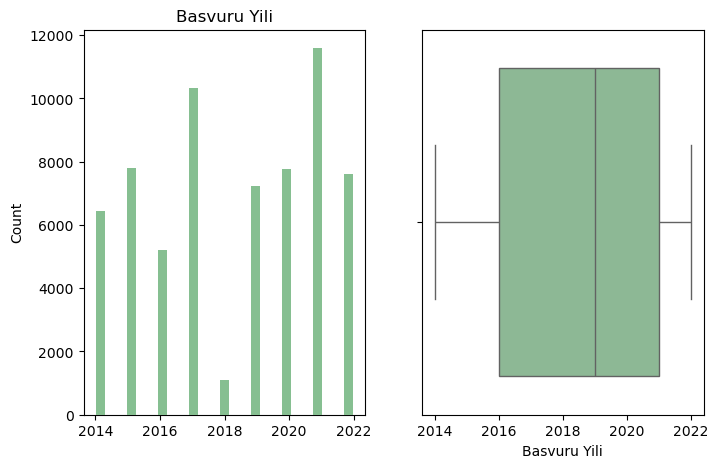

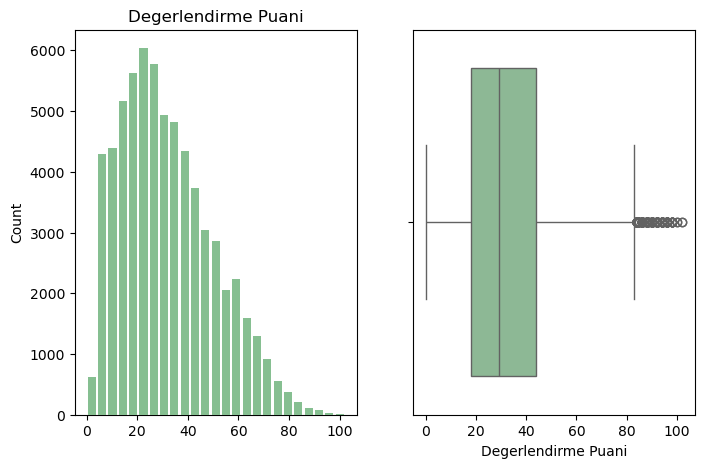

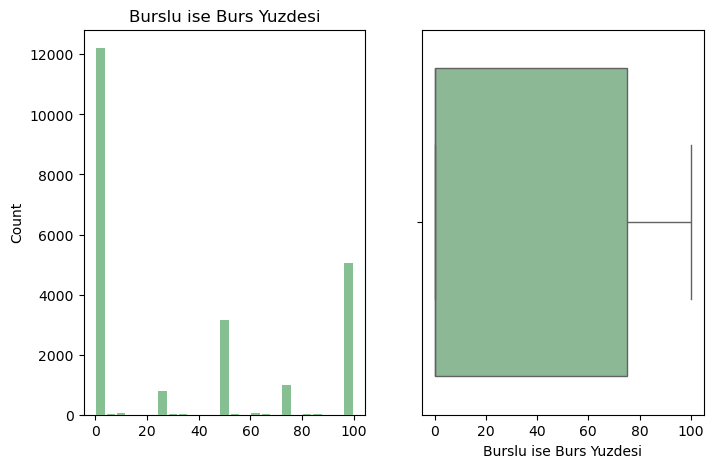

In [15]:
for col in num_cols:
    if col=='id':
        continue
    plt.figure(figsize = (8, 5))
    plt.subplot(1, 2, 1)
    plt.title(col)
    train_data[col].hist( bins=25, grid=False, color='#86bf91', zorder=5, rwidth=0.8)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_data[col],color='#86bf91')
    plt.show()  

In [16]:
print(len(train_data[train_data['Degerlendirme Puani']>80]))
# delete outliers of target column as it occurs in 462 rows
train_data=train_data.drop(train_data[train_data['Degerlendirme Puani']>80].index)
fill_missing_value_in_columns_with_mode_value(train_data,'Degerlendirme Puani')

462


In [17]:
#since id is unneccesary
#train_data=train_data.drop(columns=['id'])

In [18]:
#since burslu ise burs yüzdesi is nan in test column
train_data, test_data=drop_columns_from_train_test(train_data,test_data,'Burslu ise Burs Yuzdesi')

In [19]:
test_data['Basvuru Yili'].unique()

array([2023], dtype=int64)

In [20]:
train_data['Basvuru Yili'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

# EDA for Categorical Columns

In [21]:
cat_cols

['Cinsiyet',
 'Dogum Tarihi',
 'Dogum Yeri',
 'Ikametgah Sehri',
 'Universite Adi',
 'Universite Turu',
 'Burs Aliyor mu?',
 'Bölüm',
 'Universite Kacinci Sinif',
 'Universite Not Ortalamasi',
 'Daha Once Baska Bir Universiteden Mezun Olmus',
 'Lise Adi',
 'Lise Adi Diger',
 'Lise Sehir',
 'Lise Turu',
 'Lise Bolumu',
 'Lise Bolum Diger',
 'Lise Mezuniyet Notu',
 'Baska Bir Kurumdan Burs Aliyor mu?',
 'Burs Aldigi Baska Kurum',
 'Baska Kurumdan Aldigi Burs Miktari',
 'Anne Egitim Durumu',
 'Anne Calisma Durumu',
 'Anne Sektor',
 'Baba Egitim Durumu',
 'Baba Calisma Durumu',
 'Baba Sektor',
 'Kardes Sayisi',
 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
 'Uye Oldugunuz Kulubun Ismi',
 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
 'Spor Dalindaki Rolunuz Nedir?',
 'Aktif olarak bir STK üyesi misiniz?',
 "Hangi STK'nin Uyesisiniz?",
 'Stk Projesine Katildiniz Mi?',
 'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
 'I

### Cinsiyet

    

In [22]:
check_column_in_train_test(train_data,test_data,'Cinsiyet')

Train Data Uniqueness
['Erkek' 'Kadın' 'ERKEK' 'Belirtmek istemiyorum' nan]
--------------------
Test Data Uniqueness
['Kadın' 'Erkek' 'Belirtmek istemiyorum']
---------------------
---------------------
Train Data Isna()
169
---------------------
Test Data Isna()
0


In [23]:
lower_string_in_column(train_data,'Cinsiyet')
lower_string_in_column(test_data,'Cinsiyet')

In [24]:
fill_missing_value_in_columns_with_mode_value(train_data,'Cinsiyet')

### Doğum Tarihi

In [25]:
train_data, test_data=drop_columns_from_train_test(train_data,test_data,'Dogum Tarihi')

In [26]:
#check_column_in_train_test(train_data,test_data,'Dogum Tarihi')

In [27]:
turkey_cities = [
    'adana', 'adıyaman', 'afyonkarahisar', 'ağrı', 'amasya', 'ankara', 'antalya',
    'artvin', 'aydın', 'balıkesir', 'bartın', 'batman', 'bayburt', 'bilecik',
    'bingöl', 'bitlis', 'bolu', 'burdur', 'bursa', 'çanakkale', 'çankırı',
    'çorum', 'denizli', 'diyarbakır', 'düzce', 'edirne', 'elazığ', 'erzincan',
    'erzurum', 'eskişehir', 'gaziantep', 'giresun', 'gümüşhane', 'hakkari',
    'hatay', 'iğdır', 'ısparta', 'istanbul', 'izmir', 'kahramanmaraş',
    'karabük', 'karaman', 'kars', 'kastamonu', 'kayseri', 'kırıkkale',
    'kırklareli', 'kırşehir', 'kocaeli', 'konya', 'kütahya', 'malatya',
    'manisa', 'mardin', 'mersin', 'muğla', 'muş', 'nevşehir', 'niğde',
    'ordu', 'osmaniye', 'rize', 'sakarya', 'samsun', 'siirt', 'sivas',
    'şanlıurfa', 'şırnak', 'tekirdağ', 'tokat', 'trabzon', 'tunceli',
    'uşak', 'van', 'yalova', 'yozgat', 'zonguldak'
]


### Doğum Yeri

In [28]:
sehirler_map= {
    'istanbul': 'istanbul',
    'i̇stanbul': 'istanbul',
    'i̇stabul':'istanbul',
    'kartal-i̇stanbul':'istanbul',
    'i̇stanbul bakırköy': 'istanbul',
    'bakirköy-i̇stanbul':'istanbul',
    'bakırköy/i̇stanbul':'istanbul',
    'i̇stanbul-şişli': 'istanbul',
    'i̇stanbul - beşi̇ktaş':'istanbul',
    'i̇stanbul/ kadıköy': 'istanbul',
    'taksim/i̇stanbul':'istanbul',
    'maltepe / i̇stanbul':'istanbul',
    'fatih/i̇stanbul':'istanbul',
    'fatih/i̇stanbul':'istanbul',
    'kadikoy/istanbul':'istanbul',
    'büyükçekmece /i̇stanbul':'istanbul',
    'kartal/ i̇stanbul':'istanbul',
    'bakırköy istanbul':'istanbul',
    'çerkezköy':'istanbul',
    'i̇stanbul/ fatih':'istanbul',
    'sarıyer/ i̇stanbul':'istanbul',
    'i̇stanbul/ kartal':'istanbul',
    'kadıköy / i̇stanbul':'istanbul',
    'gaziosmanpaşa / i̇stanbul':'istanbul',
    'ataşehir/i̇stanbul':'istanbul',
    'güngören/i̇stanbul':'istanbul',
    'esenler/i̇stanbul':'istanbul',
    'üsküdar/i̇stanbul':'istanbul',
    
    'ankara keçiören':'ankara',
    'ankara/altındağ':'ankara',
    'altindag, ankara':'ankara',
    'ankara/çankaya':'ankara',
    'ankara-elmadağ':'ankara',
    'çankaya/ankara':'ankara',
    'polatlı/ankara':'ankara',
 
    'izmir': 'izmir',
    'i̇zmir': 'izmir',
    'izmir/': 'izmir',
    'i̇zmir-': 'izmir',
    'i̇zmir (': 'izmir',
    'i̇zmir)': 'izmir',
    'konak/i̇zmi̇r':'izmir',
    'bornova/i̇zmi̇r':'izmir',
    'ti̇re/i̇zmi̇r':'izmir',

    'k.maraş':'kahramanmaraş',
    'k.maras':'kahramanmaraş',
    
    'di̇yarbakir':'diyarbakır'   ,
    'gebze/kocaeli̇':'kocaeli'
}

In [29]:
#check_column_in_train_test(train_data,test_data,'Dogum Yeri')

In [30]:
lower_string_in_column(train_data,'Dogum Yeri')
lower_string_in_column(test_data,'Dogum Yeri')

In [31]:
train_data['Dogum Yeri'] = train_data['Dogum Yeri'].replace(sehirler_map)



In [32]:
cleaned_dogum_yeri_map=map_cleaned_data_into_column(train_data,'Dogum Yeri')
train_data['Dogum Yeri'] = train_data['Dogum Yeri'].replace(cleaned_dogum_yeri_map)
non_alpha_words = find_non_alpha_strings_in_column(train_data,'Dogum Yeri')
fill_missing_value_in_columns_with_mode_value(train_data,'Dogum Yeri')
#print(non_alpha_words)

Found 1124 non-alpha entries.


### İkametgah Şehri

In [33]:
#check_column_in_train_test(train_data,test_data,'Ikametgah Sehri')

In [34]:
lower_string_in_column(train_data,'Ikametgah Sehri')
lower_string_in_column(test_data,'Ikametgah Sehri')

In [35]:
train_data['Ikametgah Sehri'] = train_data['Ikametgah Sehri'].replace(sehirler_map)

train_data['Ikametgah Sehri'] =train_data['Ikametgah Sehri'] .replace('------',train_data['Ikametgah Sehri'].mode()[0])


In [36]:
cleaned_ikametgah_sehri_map=map_cleaned_data_into_column(train_data,'Ikametgah Sehri')

train_data['Ikametgah Sehri'] = train_data['Ikametgah Sehri'].replace(cleaned_ikametgah_sehri_map)

Found 97 non-alpha entries.


In [37]:
fill_missing_value_in_columns_with_mode_value(train_data,'Ikametgah Sehri')

### Universite Adi

In [38]:
#check_column_in_train_test(train_data,test_data,'Universite Adi')

In [39]:
lower_string_in_column(train_data,'Universite Adi')
lower_string_in_column(test_data,'Universite Adi')

In [40]:
len(train_data[train_data['Universite Adi']=='diğer'].index)

372

In [41]:
train_data['Universite Adi'] =train_data['Universite Adi'] .replace('diğer',train_data['Universite Adi'].mode()[0])
fill_missing_value_in_columns_with_mode_value(train_data,'Universite Adi')

### Universite Turu

In [42]:
check_column_in_train_test(train_data,test_data,'Universite Turu')

Train Data Uniqueness
['Özel' 'Devlet' 'DEVLET' 'ÖZEL' nan]
--------------------
Test Data Uniqueness
['Devlet' 'Özel']
---------------------
---------------------
Train Data Isna()
255
---------------------
Test Data Isna()
0


In [43]:
lower_string_in_column(train_data,'Universite Turu')
lower_string_in_column(test_data,'Universite Turu')

In [44]:
fill_missing_value_in_columns_with_mode_value(train_data,'Universite Turu')

### Burs Aliyor mu?

In [45]:
check_column_in_train_test(train_data,test_data,'Burs Aliyor mu?')

Train Data Uniqueness
['Evet' 'Hayır' 'hayır' 'evet' 'EVET']
--------------------
Test Data Uniqueness
['Hayır' 'Evet']
---------------------
---------------------
Train Data Isna()
0
---------------------
Test Data Isna()
0


In [46]:
lower_string_in_column(train_data,'Burs Aliyor mu?')
lower_string_in_column(test_data,'Burs Aliyor mu?')

### Bölüm

In [47]:
check_column_in_train_test(train_data,test_data,'Bölüm')

Train Data Uniqueness
['Bilgisayar Muhendisligi' 'Elektrik Elektronik Mühendisliği'
 'Finans Yönetimi ve Pazarlama' ... 'Yiyecek ve İçecek İşletmeciliği'
 'İslam İktisadı ve Finans' 'Nanoteknoloji Mühendisliği']
--------------------
Test Data Uniqueness
['Sosyal Hizmet' 'Uluslararası İlişkiler' 'Diğer' 'İslami İlimler'
 'İşletme' 'Bilgisayar Mühendisliği' 'Hemşirelik' 'Çocuk Gelişimi'
 'İlahiyat' 'Almanca Öğretmenliği' 'İlköğretim Matematik Öğretmenliği'
 'Metalurji ve Malzeme Mühendisliği' 'Endüstri Mühendisliği'
 'Bitki Koruma' 'Hukuk' 'Matematik' 'İktisat'
 'Elektrik-Elektronik Mühendisliği' 'Tıp' 'Psikoloji'
 'Hemşirelik ve Sağlık Hizmetleri' 'Özel Eğitim Öğretmenliği'
 'Biyomühendislik' 'Beden Eğitimi ve Spor Öğretmenliği'
 'Rehberlik ve Psikolojik Danışmanlık' 'Okul Öncesi Öğretmenliği'
 'Hidrojeoloji Mühendisliği' 'Bilişim Sistemleri Mühendisliği'
 'Moleküler Biyoloji ve Genetik' 'Bilgisayar Bilimi ve Mühendisliği'
 'Yazılım Mühendisliği' 'İnşaat Mühendisliği' 'Sosyoloji' 'Diş H

In [48]:
lower_string_in_column(train_data,'Bölüm')
lower_string_in_column(test_data,'Bölüm')

In [49]:
train_data['Bölüm']=train_data['Bölüm'].fillna('diğer')

### Universite Kacinci Sinif

In [50]:
check_column_in_train_test(train_data,test_data,'Universite Kacinci Sinif')

Train Data Uniqueness
['3' '1' nan '2' '4' 'Hazırlık' 'Mezun' 'hazırlık' 'Yüksek Lisans' '5' '6'
 'Tez' '0']
--------------------
Test Data Uniqueness
['1' '3' '2' '4' 'Hazırlık' '5' '6']
---------------------
---------------------
Train Data Isna()
374
---------------------
Test Data Isna()
0


In [51]:
lower_string_in_column(train_data,'Universite Kacinci Sinif')
lower_string_in_column(test_data,'Universite Kacinci Sinif')

In [52]:
standardized_uni_classes = {
    '0':'hazırlık'    
}
train_data['Universite Kacinci Sinif'] = train_data['Universite Kacinci Sinif'].replace(standardized_uni_classes)

In [53]:
uni_kacinci_sinif_ordinal_mapping = {
    'hazırlık': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    'mezun': 7,
    'yüksek lisans': 8,
    'tez': 9
}

In [54]:
train_data['Universite Kacinci Sinif'] = train_data['Universite Kacinci Sinif'].replace(uni_kacinci_sinif_ordinal_mapping)
test_data['Universite Kacinci Sinif'] = test_data['Universite Kacinci Sinif'].replace(uni_kacinci_sinif_ordinal_mapping)
fill_missing_value_in_columns_with_mode_value(train_data,'Universite Kacinci Sinif' )


C:\Users\Naz\AppData\Local\Temp\ipykernel_13624\1213342546.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Universite Kacinci Sinif'] = train_data['Universite Kacinci Sinif'].replace(uni_kacinci_sinif_ordinal_mapping)
C:\Users\Naz\AppData\Local\Temp\ipykernel_13624\1213342546.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Universite Kacinci Sinif'] = test_data['Universite Kacinci Sinif'].replace(uni_kacinci_sinif_ordinal_mapping)


### Üniversite Not Ortalaması

In [55]:
check_column_in_train_test(train_data,test_data,'Universite Not Ortalamasi')

Train Data Uniqueness
['3.50-3' '3.00-2.50' nan '2.50 ve altı' '3.00 - 4.00' '3.50 - 4.00'
 '3.00 - 3.50' '2.50 -3.00' 'Ortalama bulunmuyor' 'ORTALAMA BULUNMUYOR'
 '4-3.5' '2.50 - 3.00' '2.00 - 2.50' '1.00 - 2.50' 'Not ortalaması yok'
 '4.0-3.5' '3.00 - 3.49' '2.50 - 2.99' '1.80 - 2.49' 'Hazırlığım'
 '0 - 1.79']
--------------------
Test Data Uniqueness
['2.50 - 2.99' 'Hazırlığım' '3.00 - 3.49' '1.80 - 2.49' '3.50 - 4.00'
 '0 - 1.79']
---------------------
---------------------
Train Data Isna()
2753
---------------------
Test Data Isna()
0


In [56]:
uni_not_ort_map = {
    '4.00 - 3.50': 9,
    '3.50 - 4.00': 9,
    '4.0-3.5': 9,
    '4-3.5': 9,
    '3.00 - 4.00':8,
    '3.50 - 3.00': 8,
    '3.00 - 3.50': 8,
    '3.00 - 3.49': 8,
    '3.00 - 2.50': 7,
    '3.00-2.50':7,
    '3.50-3': 7,
    '2.50 - 3.00': 6,
    '2.50 -3.00': 6,
    '2.50 - 2.99': 6,
    '2.00 - 2.50': 5,
    '2.50 ve altı': 5,
    '1.80 - 2.49': 4,
    '1.00 - 2.50': 4,
    '0 - 1.79': 3,
     'not ortalaması yok': -1,
    'ortalama bulunmuyor': -1,
    'hazırlığım': -1
}

In [57]:
lower_string_in_column(train_data,'Universite Not Ortalamasi')
lower_string_in_column(test_data,'Universite Not Ortalamasi')

In [58]:
train_data['Universite Not Ortalamasi'] = train_data['Universite Not Ortalamasi'].replace(uni_not_ort_map)
fill_missing_value_in_columns_with_mode_value(train_data,'Universite Not Ortalamasi')
test_data['Universite Not Ortalamasi'] = test_data['Universite Not Ortalamasi'].replace(uni_not_ort_map)

C:\Users\Naz\AppData\Local\Temp\ipykernel_13624\3375235560.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Universite Not Ortalamasi'] = train_data['Universite Not Ortalamasi'].replace(uni_not_ort_map)
C:\Users\Naz\AppData\Local\Temp\ipykernel_13624\3375235560.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Universite Not Ortalamasi'] = test_data['Universite Not Ortalamasi'].replace(uni_not_ort_map)


### Daha Once Baska Bir Universiteden Mezun Olmus

In [59]:
check_column_in_train_test(train_data,test_data, 'Daha Once Baska Bir Universiteden Mezun Olmus')

Train Data Uniqueness
['Hayır' 'Evet' nan]
--------------------
Test Data Uniqueness
[nan]
---------------------
---------------------
Train Data Isna()
37336
---------------------
Test Data Isna()
11049


In [60]:
train_data,test_data=drop_columns_from_train_test(train_data,test_data, 'Daha Once Baska Bir Universiteden Mezun Olmus')

### Lise Adi

In [61]:
check_column_in_train_test(train_data,test_data,'Lise Adi')

Train Data Uniqueness
['Ankara Ataturk Anadolu Lisesi' 'Betül Can Anadolu Lisesi' 'Batem' ...
 'BAĞCILAR EDİP İPLİK MESLEKİ VE TEKNİK ANADOLU LİSESİ'
 'Ahmet Vefik paşa Anadolu lisesi'
 'Samsun Terme Karadeniz mesleki teknik Anadolu lisesi']
--------------------
Test Data Uniqueness
['Amasya Suluova Şehit Muharrem Saygun Anadolu Lisesi'
 'Açık Öğretim Lisesi' 'Özel Aşama anadolu lisesi' ...
 'mehmet rüştü uzel mesleki teknik anadolu lisesi'
 'Prof. Dr. Ömer Dinçer Kız Anadolu İmam Hatip Lisesi' 'Nokta tek koleji']
---------------------
---------------------
Train Data Isna()
384
---------------------
Test Data Isna()
0


In [62]:
lower_string_in_column(train_data,'Lise Adi')
lower_string_in_column(test_data,'Lise Adi')

In [63]:
mode_value = train_data['Lise Adi'].mode()[0]
train_data['Lise Adi'] = train_data['Lise Adi'].replace('------', mode_value)


In [64]:
fill_missing_value_in_columns_with_mode_value(train_data,'Lise Adi')

### Lise Adi Diger

In [65]:

check_column_in_train_test(train_data,test_data,'Lise Adi Diger')

Train Data Uniqueness
[nan 'İstanbul Alman Lisesi' 'şehzade mehmet koleji' ...
 'Gençosman İmkb tml' 'nefise andicen lisesi' 'büyük çiğli anadolu lisesi']
--------------------
Test Data Uniqueness
[nan]
---------------------
---------------------
Train Data Isna()
59933
---------------------
Test Data Isna()
11049


In [66]:
train_data,test_data=drop_columns_from_train_test(train_data,test_data,'Lise Adi Diger')

### Lise Sehir

In [67]:
#check_column_in_train_test(train_data,test_data,'Lise Sehir')

In [68]:
lower_string_in_column(train_data,'Lise Sehir')
lower_string_in_column(test_data,'Lise Sehir')

In [69]:
train_data['Lise Sehir'] = train_data['Lise Sehir'].replace(sehirler_map)

train_data['Lise Sehir'] =train_data['Lise Sehir'] .replace('------',train_data['Lise Sehir'].mode()[0])

cleaned_lise_sehir_map=map_cleaned_data_into_column(train_data,'Lise Sehir')

train_data['Lise Sehir'] = train_data['Lise Sehir'].replace(cleaned_lise_sehir_map)


Found 391 non-alpha entries.


In [70]:
fill_missing_value_in_columns_with_mode_value(train_data,'Lise Sehir')

### Lise Turu

In [71]:
#check_column_in_train_test(train_data,test_data,'Lise Turu')

In [72]:
lower_string_in_column(train_data,'Lise Turu')
lower_string_in_column(test_data,'Lise Turu')

In [73]:
lise_turu_map={
    'meslek':'meslek lisesi',
     'özel lisesi':'özel lise',
     'özel':'özel lise',
    'devlet':'anadolu lisesi'
    
}
train_data['Lise Turu'] = train_data['Lise Turu'].replace(lise_turu_map)

In [74]:
lise_turu_map_devlet_ozel={
    'anadolu lisesi':'devlet',
    'meslek lisesi':'devlet',
    'fen lisesi':'devlet',
     'düz lise':'devlet',
    'i̇mam hatip lisesi':'devlet',
    'diğer':'özel',
     'özel lise':'özel'    
   
}
train_data['Lise Turu'] = train_data['Lise Turu'].replace(lise_turu_map_devlet_ozel)

In [75]:
fill_missing_value_in_columns_with_mode_value(train_data,'Lise Turu')

### Lise Bölümü

In [76]:
check_column_in_train_test(train_data,test_data,'Lise Bolumu')

Train Data Uniqueness
['MF' 'Elektirk' 'Sayısal' 'TM' 'EA' 'TS 1-2' 'Fen' 'Düz lise' 'sayısal'
 'Elektrikli Ev Aletleri' 'EŞIT AĞIRLIK' 'TS' 'Eşit Ağırlık'
 'Matematik - Fen' 'Fen matematik' 'Matematik Fen' 'Eşit ağırlık'
 'türkçe ve matematik' 'KONAKLAMA VE SEYAHAT HİZMETLERİ' 'Esit Agirlik'
 'Fen - Matematik' 'Türkçe - Matematik' 'esıt agırlık'
 'Bilişim Teknolojileri' 'Tm' 'Fen-Matematik' 'Sayisal' 'Fen Bilimleri'
 'türkçe-matematik' 'Sayisal MF' 'Türkçe-Matematik' 'tm' 'matematik-fen'
 'yok' '1 yıl TS , 2 yıl TM' 'Sözel' 'Matematik-Fen' 'esit agirlik'
 'Turkce matematil' 'Mf' 'Sosyal bilimler' 'EŞİT AĞIRLIK' 'FEN-MATEMATİK'
 'FEN BİLİMLERİ' 'Sayısal Matematik - Fen Bilimleri MF' 'Matematik/Fen'
 'SAYISAL' 'eşit ağırlık' 'FM' 'eşit agırlık' 'sözel' 'Türkçe matematik'
 'eşit ağirlik' 'Grafik Ve Fotoğraf' 'fen' 'türkçe matematik'
 'TMSSosyal Bilimler Liselerine Özel ayrıca IBDP denilen International Baccalaureate Diploma Programme adında uluslararası ekstra bir diplomam daha var'
 'SP

In [77]:
fill_missing_value_in_columns_with_mode_value(train_data,'Lise Bolumu')

In [78]:
lower_string_in_column(train_data,'Lise Bolumu')
lower_string_in_column(test_data,'Lise Bolumu')

In [79]:
train_data['Lise Bolumu'] = train_data['Lise Bolumu'].apply(clean_lise_bolumu)


In [80]:
fill_missing_value_in_columns_with_mode_value(train_data,'Lise Bolumu')

### Lise bolum diğer

In [81]:
#check_column_in_train_test(train_data,test_data,'Lise Bolum Diger')

In [82]:
# lower_string_in_column(train_data,'Lise Bolum Diger')
# lower_string_in_column(test_data,'Lise Bolum Diger')

In [83]:
train_data,test_data=drop_columns_from_train_test(train_data,test_data,'Lise Bolum Diger')

### Lise Mezuniyet Notu

In [84]:
check_column_in_train_test(train_data,test_data,'Lise Mezuniyet Notu')

Train Data Uniqueness
['3.50-3' '3.00 - 4.00' '3.00-2.50' '2.50 ve altı' '4.00-3.50' '3.50-3.00'
 nan '69-55' '100-85' '84-70' '54-45' '44-0' '75 - 100' '50 - 75'
 'Not ortalaması yok' '25 - 50' '0 - 25' '50 - 74' '25 - 49' '0 - 24']
--------------------
Test Data Uniqueness
['50 - 74' '75 - 100' '25 - 49']
---------------------
---------------------
Train Data Isna()
5481
---------------------
Test Data Isna()
0


In [85]:
lower_string_in_column(train_data,'Lise Mezuniyet Notu')
lower_string_in_column(test_data,'Lise Mezuniyet Notu')

In [86]:
lise_mezuniyet_notu_map = {
    '3.50-3': '50 - 74',
    '3.00 - 4.00': '75 - 100',
    '3.00-2.50': '25 - 49',
    '2.50 ve altı': '25 - 49',
    '4.00-3.50': '75 - 100',
    '3.50-3.00': '50 - 74',
    '69-55': '50 - 74',
    '100-85': '75 - 100',
    '84-70': '75 - 100',
    '54-45': '50 - 74',
    '44-0': '25 - 49',
    '75 - 100': '75 - 100',
    '50 - 75': '50 - 74',
    'not ortalaması yok': np.nan,  # Keep as is
    '25 - 50': '25 - 49',
    '0 - 25': '25 - 49',
    '50 - 74': '50 - 74',
    '25 - 49': '25 - 49',
    '0 - 24': '25 - 49'
}

In [87]:
train_data['Lise Mezuniyet Notu'] = train_data['Lise Mezuniyet Notu'].map(lise_mezuniyet_notu_map)

fill_missing_value_in_columns_with_mode_value(train_data,'Lise Mezuniyet Notu')

### Başka Bir Kurumdan Burs Alıyor mu?

In [88]:
check_column_in_train_test(train_data,test_data,'Baska Bir Kurumdan Burs Aliyor mu?')

Train Data Uniqueness
['Hayır' 'Evet' nan]
--------------------
Test Data Uniqueness
['Hayır' 'Evet']
---------------------
---------------------
Train Data Isna()
231
---------------------
Test Data Isna()
0


In [89]:
lower_string_in_column(train_data,'Baska Bir Kurumdan Burs Aliyor mu?')
lower_string_in_column(test_data,'Baska Bir Kurumdan Burs Aliyor mu?')

In [90]:
fill_missing_value_in_columns_with_mode_value(train_data,'Baska Bir Kurumdan Burs Aliyor mu?')

### Burs Aldigi Baska Kurum

In [91]:
check_column_in_train_test(train_data,test_data,'Burs Aldigi Baska Kurum')

Train Data Uniqueness
[nan 'kyk' 'KYK' ... 'KYK/BURSKOOP' 'Nuh Çimento Vakfı' 'KYK Yök bursu']
--------------------
Test Data Uniqueness
['-' 'KYK' 'Toplum Gönüllüleri Vakfı' ... 'Akhisar Ticaret Borsası'
 'T3vakfı' 'kredi yurtlar kurumu /kredi alıyorum']
---------------------
---------------------
Train Data Isna()
43604
---------------------
Test Data Isna()
0


In [92]:
lower_string_in_column(train_data,'Burs Aldigi Baska Kurum')
lower_string_in_column(test_data,'Burs Aldigi Baska Kurum')

In [93]:
# 1. Lowercase and remove extra spaces
train_data['Burs Aldigi Baska Kurum'] = train_data['Burs Aldigi Baska Kurum'].str.lower().str.strip()

# 2. Define a mapping for manual replacements
replace_dict = {
    'kyk': ['kyk', 'ky','kyk yök bursu','kyk/burskoop', 'kyk( kredi ve yurtlar kurumu)','kyk y','kredi ve yurtlar kurum','kredi ve yurtlar kurumu', 'kredi yurtlar kurumu', 'kyk bursu', 'kredi̇ ve yurtlar kurumu', 'kyk devlet bursu', 'kyk kredi', 'kredi̇ yurtlar kurumu',
            'yüksek öğrenim kredi ve yurtlar kurumu', 'kredi ve yurtlar genel müdürlüğü', 'kyk burs', 'kyk bursu alıyorum', 'kredi̇ yurtlar kurumu', 
            'başbakanlık bursu', 'kyk bursu alıyorum.', 'kyk öğrenim kredisi', 'kredi ve yurtlar kurumu (kyk)', 'kyk öğrenim bursu', 'devlet kyk', 'yükseköğrenim kredi ve yurtlar kurumu'],
    'devlet': ['devlet bursu', 'başbakanlık', 'devlet','devlet bursu = gençlik ve spor bakanlığı','gençlik ve spor bakanlığı','yüksek öğretim kurumları'],
    'tev': ['tev', 'türk eğitim vakfı'],
    '': ['-', 'k']  # Empty string key to handle these cases
}

In [94]:
# Apply the function to the column
train_data['Burs Aldigi Baska Kurum'] = train_data['Burs Aldigi Baska Kurum'].apply(lambda x: replace_scholarships(x, replace_dict))

# Check for remaining NaN values
remaining_nan_count = train_data['Burs Aldigi Baska Kurum'].isna().sum()
print(f"Remaining NaN values: {remaining_nan_count}")

Remaining NaN values: 43604


In [95]:
train_data['Burs Aldigi Baska Kurum']=train_data['Burs Aldigi Baska Kurum'].fillna('-')

### Baska Kurumdan Aldigi Burs Miktari

In [96]:

check_column_in_train_test(train_data,test_data,'Baska Kurumdan Aldigi Burs Miktari')

Train Data Uniqueness
[nan '300' '300 TL' '150 TL' '430tlyılda 10 ay' '400' '250 TL'
 'Toplamda 1000 lira fakat mezun oldugun icin devam etmiyor' '850 TL'
 '500 TL' '300 tl' 'AYLIK 280 TL' '430' '1000 TL' '900 TL' '300 LİRA'
 '365' '500TL, 300TL' '125 TL' '850' '180' '260' '300 lira' '425 TL'
 'aylık 100 tl' '300 TL nakit + yemek + ulaşım' '300TL' '250' '900' '150'
 '400 TL' '800' '300 tl aylık' '280' '400,00 TL' '200 TL' '430 tl'
 '500 TL - 300 TL' '400 tl' '325 TL' '300 TL / Aylık' '275 TLAYLIK'
 '10 ay süre ile aylık 600 TL' '500 tl ve 300 tl' '500 tl'
 'BİN TÜRK LİRASI' '475' '300,0 tl' '675 TL' 'kredi-300' 'Aylık 300 TL'
 '300-400' '750' '330 TL' 'aylık 330 tl' '490' '320 TL' '560 TL'
 'Tam Burslu olduğum için yalnız eğitim ücreti ek burs almıyorum' '500'
 '600 TL/Yurt Bursu/Kitap Bursu' '430TL' '350' '600'
 '8 Ay Boyunca Aylık 720 TL' '330' '250 tl'
 '350 TL - Türkiye Girişimcilik Vakfından burs kazandığım takdirde Çelik İhracatçıları Birliğindeki bursumdan vazgeçeceğim.'
 '150 T

In [97]:
train_data['Baska Kurumdan Aldigi Burs Miktari']=train_data['Baska Kurumdan Aldigi Burs Miktari'].replace('nan', np.nan)


In [98]:
lower_string_in_column(train_data,'Baska Kurumdan Aldigi Burs Miktari')

In [99]:
train_data['Baska Kurumdan Aldigi Burs Miktari'] = train_data['Baska Kurumdan Aldigi Burs Miktari'].apply(clean_amount)

In [100]:
train_data['Baska Kurumdan Aldigi Burs Miktari'] = train_data['Baska Kurumdan Aldigi Burs Miktari'].apply(categorize_amount)


In [101]:
baska_kurum_test_data_map={
    '0 - 499 ₺':'0 - 499₺'
}

In [102]:
baska_kurum_test_data_map={
    '0 - 499 ₺':'0 - 499₺'
}

In [103]:
test_data['Baska Kurumdan Aldigi Burs Miktari']=test_data['Baska Kurumdan Aldigi Burs Miktari'].replace(baska_kurum_test_data_map)

In [104]:
baska_kurum_burs_miktari_ordinal_mapping = {
    '-':0,
    '0 - 499₺':1,
    '500₺ - 999₺':2,
    '1000₺ ve üstü':3
 }

In [105]:
test_data['Baska Kurumdan Aldigi Burs Miktari']= test_data['Baska Kurumdan Aldigi Burs Miktari'].replace(baska_kurum_burs_miktari_ordinal_mapping)
train_data['Baska Kurumdan Aldigi Burs Miktari']= train_data['Baska Kurumdan Aldigi Burs Miktari'].replace(baska_kurum_burs_miktari_ordinal_mapping)


C:\Users\Naz\AppData\Local\Temp\ipykernel_13624\3658120266.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Baska Kurumdan Aldigi Burs Miktari']= test_data['Baska Kurumdan Aldigi Burs Miktari'].replace(baska_kurum_burs_miktari_ordinal_mapping)
C:\Users\Naz\AppData\Local\Temp\ipykernel_13624\3658120266.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Baska Kurumdan Aldigi Burs Miktari']= train_data['Baska Kurumdan Aldigi Burs Miktari'].replace(baska_kurum_burs_miktari_ordinal_mapping)


### Anne Eğitim Durumu

In [106]:
check_column_in_train_test(train_data,test_data,'Anne Egitim Durumu')

Train Data Uniqueness
['Üniversite' 'İlkokul Mezunu' 'Eğitim Yok' 'Lise' 'Ortaokul Mezunu'
 'Yüksek Lisans / Doktora' 'Üniversite Mezunu' 'Lise Mezunu'
 'Yüksek Lisans / Doktara' 'İLKOKUL MEZUNU' 'LİSE' 'EĞİTİM YOK' nan
 'ÜNİVERSİTE' 'ORTAOKUL MEZUNU' 'DOKTORA' 'YÜKSEK LİSANS' 'Ortaokul'
 'İlkokul' 'Yüksek Lisans' 'Eğitimi yok' 'Doktora']
--------------------
Test Data Uniqueness
['İlkokul' 'Yüksek Lisans' 'Üniversite' 'Eğitimi yok' 'Lise' 'Ortaokul'
 'Doktora']
---------------------
---------------------
Train Data Isna()
406
---------------------
Test Data Isna()
0


In [107]:
lower_string_in_column(train_data,'Anne Egitim Durumu')
lower_string_in_column(test_data,'Anne Egitim Durumu')

In [108]:
egitim_durumu_map={
    'üniversite mezunu':'üniversite',
    'üni̇versi̇te':'üniversite',
    'ortaokul mezunu':'ortaokul',
    'i̇lkokul mezunu':'i̇lkokul',
    'yüksek lisans / doktara':'yüksek lisans',
    'yüksek lisans / doktora':'yüksek lisans',
    'yüksek lisans':'yüksek lisans',
    'yüksek li̇sans':'yüksek lisans',
    'lise mezunu':'lise',
    'eğitim yok':'eğitimi yok',
    'eği̇ti̇m yok':'eğitimi yok',
    'eğitimi yok':'eğitimi yok',
    'li̇se':'lise',
    'li̇se':'lise',
    '0':'eğitimi yok',
    np.nan:'eğitimi yok'

}

In [109]:
train_data['Anne Egitim Durumu'] = train_data['Anne Egitim Durumu'].replace(egitim_durumu_map)


### Anne Calisma Durumu

In [110]:
check_column_in_train_test(train_data,test_data,'Anne Calisma Durumu')

Train Data Uniqueness
['Hayır' 'Evet' 'Emekli' nan]
--------------------
Test Data Uniqueness
['Evet' 'Hayır']
---------------------
---------------------
Train Data Isna()
11896
---------------------
Test Data Isna()
0


In [111]:
lower_string_in_column(train_data,'Anne Calisma Durumu')
lower_string_in_column(test_data,'Anne Calisma Durumu')

In [112]:
anne_calisma_durumu_map={
    'emekli':'hayır'
}
train_data['Anne Calisma Durumu'] = train_data['Anne Calisma Durumu'].replace(anne_calisma_durumu_map)


In [113]:
fill_missing_value_in_columns_with_mode_value(train_data,'Anne Calisma Durumu')

### Anne Sektör

In [114]:
check_column_in_train_test(train_data,test_data,'Anne Sektor')

Train Data Uniqueness
['0' 'Kamu' 'Özel Sektör' 'Diğer' nan 'KAMU' 'ÖZEL SEKTÖR' 'DİĞER' '-']
--------------------
Test Data Uniqueness
['Özel Sektör' '-' 'Kamu' 'Diğer']
---------------------
---------------------
Train Data Isna()
34220
---------------------
Test Data Isna()
0


In [115]:
lower_string_in_column(train_data,'Anne Sektor')
lower_string_in_column(test_data,'Anne Sektor')

In [116]:
sektor_map={
    '0':'-',
     'diğer':'diğer',
    'di̇ğer':'diğer',
    np.nan:'-'
    
}
train_data['Anne Sektor'] = train_data['Anne Sektor'].replace(sektor_map)


### Baba Eğitim Durumu

In [117]:
check_column_in_train_test(train_data,test_data,'Baba Egitim Durumu')

Train Data Uniqueness
['Üniversite' 'Yüksek Lisans / Doktora' 'İlkokul Mezunu' nan
 'Ortaokul Mezunu' 'Lise' 'Eğitim Yok' '0' 'Üniversite Mezunu'
 'Lise Mezunu' 'Yüksek Lisans / Doktara' 'İLKOKUL MEZUNU' 'ÜNİVERSİTE'
 'EĞİTİM YOK' 'ORTAOKUL MEZUNU' 'LİSE' 'YÜKSEK LİSANS' 'DOKTORA' 'İlkokul'
 'Ortaokul' 'Doktora' 'Yüksek Lisans' 'Eğitimi yok']
--------------------
Test Data Uniqueness
['Ortaokul' 'İlkokul' 'Üniversite' 'Lise' 'Yüksek Lisans' 'Doktora'
 'Eğitimi yok']
---------------------
---------------------
Train Data Isna()
1006
---------------------
Test Data Isna()
0


In [118]:
lower_string_in_column(train_data,'Baba Egitim Durumu')
lower_string_in_column(test_data,'Baba Egitim Durumu')

In [119]:
train_data['Baba Egitim Durumu'] = train_data['Baba Egitim Durumu'].replace(egitim_durumu_map)


### Baba Çalışma Durumu

In [120]:
check_column_in_train_test(train_data,test_data,'Baba Calisma Durumu')

Train Data Uniqueness
['Emekli' 'Evet' nan 'Hayır']
--------------------
Test Data Uniqueness
['Evet' 'Hayır']
---------------------
---------------------
Train Data Isna()
12617
---------------------
Test Data Isna()
0


In [121]:
lower_string_in_column(train_data,'Baba Calisma Durumu')
lower_string_in_column(test_data,'Baba Calisma Durumu')

In [122]:
baba_calisma_durumu_map={
    'emekli':'hayır'
}
train_data['Baba Calisma Durumu'] = train_data['Baba Calisma Durumu'].replace(baba_calisma_durumu_map)


In [123]:
fill_missing_value_in_columns_with_mode_value(train_data,'Baba Calisma Durumu')

### Baba Sektör

In [124]:
check_column_in_train_test(train_data,test_data,'Baba Sektor')

Train Data Uniqueness
['0' 'Özel Sektör' 'Kamu' nan 'Diğer' 'KAMU' 'DİĞER' 'ÖZEL SEKTÖR' '-']
--------------------
Test Data Uniqueness
['Diğer' 'Özel Sektör' '-' 'Kamu']
---------------------
---------------------
Train Data Isna()
20172
---------------------
Test Data Isna()
0


In [125]:
lower_string_in_column(train_data,'Baba Sektor')
lower_string_in_column(test_data,'Baba Sektor')

In [126]:
train_data['Baba Sektor'] = train_data['Baba Sektor'].replace(sektor_map)


### Kardes Sayisi

In [127]:
check_column_in_train_test(train_data,test_data,'Kardes Sayisi')

Train Data Uniqueness
['1' '6' '10' '3' nan '4' '2' '5' '0' '7' '8' '11' '9' '12' '13'
 'Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat' '18' '14' '4.0' '5.0'
 '1.0' '2.0' '6.0' '3.0' '9.0' '0.0' '10.0' '7.0' '8.0']
--------------------
Test Data Uniqueness
[2. 3. 0. 4. 1.]
---------------------
---------------------
Train Data Isna()
1131
---------------------
Test Data Isna()
0


In [128]:
lower_string_in_column(train_data,'Kardes Sayisi')


In [129]:
kardes_sayisi_map={
    'kardeş sayısı 1 ek bilgi aile hk. anne vefat':'0.0'
   
}
train_data['Kardes Sayisi'] = train_data['Kardes Sayisi'].replace(kardes_sayisi_map)

In [130]:
train_data['Kardes Sayisi'] = pd.to_numeric(train_data['Kardes Sayisi'], errors='coerce')
fill_missing_value_in_columns_with_mode_value(train_data,'Kardes Sayisi')

### Girişimcilik Kulüpleri Tarzı Bir Kulübe Üye misiniz?

In [131]:
check_column_in_train_test(train_data,test_data,'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?')

Train Data Uniqueness
['Evet' 'Hayır' nan]
--------------------
Test Data Uniqueness
['Hayır' 'Evet']
---------------------
---------------------
Train Data Isna()
1828
---------------------
Test Data Isna()
0


In [132]:
lower_string_in_column(train_data,'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?')
lower_string_in_column(test_data,'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?')
fill_missing_value_in_columns_with_mode_value(train_data,'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?')

### Uye Oldugunuz Kulubun Ismi

In [133]:
#check_column_in_train_test(train_data,test_data,'Uye Oldugunuz Kulubun Ismi')

In [134]:
train_data,test_data=drop_columns_from_train_test(train_data,test_data,'Uye Oldugunuz Kulubun Ismi')

### Profesyonel Bir Spor Daliyla Mesgul musunuz?

In [135]:
check_column_in_train_test(train_data,test_data,'Profesyonel Bir Spor Daliyla Mesgul musunuz?')

Train Data Uniqueness
['Evet' 'Hayır' nan]
--------------------
Test Data Uniqueness
['Evet' 'Hayır']
---------------------
---------------------
Train Data Isna()
1114
---------------------
Test Data Isna()
0


In [136]:
lower_string_in_column(train_data,'Profesyonel Bir Spor Daliyla Mesgul musunuz?')
lower_string_in_column(test_data,'Profesyonel Bir Spor Daliyla Mesgul musunuz?')
fill_missing_value_in_columns_with_mode_value(train_data,'Profesyonel Bir Spor Daliyla Mesgul musunuz?')

### Spor Dalındaki Rolünüz Nedir?

In [137]:
check_column_in_train_test(train_data,test_data,'Spor Dalindaki Rolunuz Nedir?')

Train Data Uniqueness
['Diğer' '0' nan 'Kaptan' 'KAPTAN / LİDER' 'DİĞER' 'Lider/Kaptan'
 'Bireysel' 'Takım Oyuncusu' '-']
--------------------
Test Data Uniqueness
['Takım Oyuncusu' 'Bireysel Spor' '-' 'Lider/Kaptan' 'Diğer']
---------------------
---------------------
Train Data Isna()
32245
---------------------
Test Data Isna()
0


In [138]:
lower_string_in_column(train_data,'Spor Dalindaki Rolunuz Nedir?')
lower_string_in_column(test_data,'Spor Dalindaki Rolunuz Nedir?')

In [139]:
spor_dalindaki_rolunuz_nedir_map={
    '0': '-',
    np.nan: '-',
    'kaptan':'lider/kaptan',
    'kaptan / li̇der':'lider/kaptan',
    'diğer':'diğer',
    'di̇ğer':'diğer',
    'bireysel':'bireysel spor',
    'takım oyuncusu':'takım oyuncusu'       
}
train_data['Spor Dalindaki Rolunuz Nedir?']=train_data['Spor Dalindaki Rolunuz Nedir?'].replace(spor_dalindaki_rolunuz_nedir_map)

### Aktif olarak bir STK üyesi misiniz?

In [140]:
check_column_in_train_test(train_data,test_data,
                           'Aktif olarak bir STK üyesi misiniz?')

Train Data Uniqueness
['Hayır' nan 'Evet']
--------------------
Test Data Uniqueness
['Evet' 'Hayır']
---------------------
---------------------
Train Data Isna()
12841
---------------------
Test Data Isna()
0


In [141]:
lower_string_in_column(train_data,'Aktif olarak bir STK üyesi misiniz?')
lower_string_in_column(test_data,'Aktif olarak bir STK üyesi misiniz?')

In [142]:
fill_missing_value_in_columns_with_mode_value(train_data,'Aktif olarak bir STK üyesi misiniz?')

### Hangi STK'nin Uyesisiniz?

In [143]:

check_column_in_train_test(train_data,test_data,
                           "Hangi STK'nin Uyesisiniz?")

Train Data Uniqueness
[nan 'Demokratikleşme çabaları' 'yüz yüze projesi' ...
 "Düzenli bir şekilde Kızılay'a kan bağışı yapıyorum"
 'Gençlik merkezi ile beraber yapılan gönüllülük faaliyetinin bszilr'
 "Genç Kızılay Topluluğu'nda 3 yıldır gönüllüyüm. 1 yıl boyunca topluluğun yönetim kurulunda üye ilişkileri birimi sorumlusuydum. Şu an gönüllü olarak toplulukta aktifim."]
--------------------
Test Data Uniqueness
['Kızılay da gönüllü dağıtım' '-' 'Lise gezilerde liderlik yapıyordum' ...
 'Hayvanlara yardım adı altında hayvanlara yardım edip mama taşımıştım.'
 'Ağaç dikme, huzur evi ziyareti'
 "YetGen, YGA vb. programlarda yer aldım. Hacettepe Endüstri ve Sistem Topluluğun 'da 2021 yılında aktif üye olarak yer alırken 2022 -2023 eğitim öğretim yılı boyunca organizasyon birimi koordinatörlüğü yaptım. 2023-2024 eğitim öğretim yılında da Denetim Kurulu Başkanlığı yürüteceğim. Ayrıca Kalite Derneği GençKal Ankara'da da aktif üye olarak görev almaktayım."]
---------------------
--------------

In [144]:
lower_string_in_column(train_data, "Hangi STK'nin Uyesisiniz?")
lower_string_in_column(test_data, "Hangi STK'nin Uyesisiniz?")

In [145]:
train_data["Hangi STK'nin Uyesisiniz?"]=train_data["Hangi STK'nin Uyesisiniz?"].fillna('-')

### Stk Projesine Katildiniz Mi?

In [146]:
check_column_in_train_test(train_data,test_data,
                           'Stk Projesine Katildiniz Mi?')

Train Data Uniqueness
['Evet' 'Hayır' nan]
--------------------
Test Data Uniqueness
[nan]
---------------------
---------------------
Train Data Isna()
28299
---------------------
Test Data Isna()
11049


In [147]:
train_data, test_data=drop_columns_from_train_test(train_data,test_data, 'Stk Projesine Katildiniz Mi?')

### Girişimcilikle İlgili Deneyiminiz Var mı?

In [148]:
check_column_in_train_test(train_data,test_data,
                           'Girisimcilikle Ilgili Deneyiminiz Var Mi?')

Train Data Uniqueness
['Hayır' 'Evet' nan]
--------------------
Test Data Uniqueness
['Hayır' 'Evet']
---------------------
---------------------
Train Data Isna()
12839
---------------------
Test Data Isna()
0


In [149]:
lower_string_in_column(train_data,'Girisimcilikle Ilgili Deneyiminiz Var Mi?')
lower_string_in_column(test_data,'Girisimcilikle Ilgili Deneyiminiz Var Mi?')

In [150]:
fill_missing_value_in_columns_with_mode_value(train_data,'Girisimcilikle Ilgili Deneyiminiz Var Mi?')

### Girişimcilikle İlgili Deneyiminizi Açıklayabilir misiniz?

In [151]:
#check_column_in_train_test(train_data,test_data,  'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?')

In [152]:
train_data, test_data=drop_columns_from_train_test(train_data,test_data,'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?')

### İngilizce Biliyor musunuz?

In [153]:
check_column_in_train_test(train_data,test_data,'Ingilizce Biliyor musunuz?')

Train Data Uniqueness
[nan 'Evet' 'Hayır']
--------------------
Test Data Uniqueness
['Evet' 'Hayır']
---------------------
---------------------
Train Data Isna()
6444
---------------------
Test Data Isna()
0


In [154]:
lower_string_in_column(train_data,'Ingilizce Biliyor musunuz?')
lower_string_in_column(test_data,'Ingilizce Biliyor musunuz?')

In [155]:
fill_missing_value_in_columns_with_mode_value(train_data,'Ingilizce Biliyor musunuz?')

### İngilizce Seviyeniz?

In [156]:

check_column_in_train_test(train_data,test_data,'Ingilizce Seviyeniz?')

Train Data Uniqueness
[nan 'İleri' 'Orta' '0' 'Başlangıç']
--------------------
Test Data Uniqueness
[nan]
---------------------
---------------------
Train Data Isna()
36495
---------------------
Test Data Isna()
11049


In [157]:
train_data, test_data=drop_columns_from_train_test(train_data,test_data,'Ingilizce Seviyeniz?')

### Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite

In [158]:

#check_column_in_train_test(train_data,test_data,'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite')

In [159]:
train_data, test_data=drop_columns_from_train_test(train_data,test_data,'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite')

# Data Encoding

In [160]:
one_hot_encoding_columns=[]
frequency_encoding_columns=[]
ordinal_encoding_columns=[]
for col in train_data.select_dtypes(include=['object']).columns.tolist():
    unique_count = train_data[col].nunique()   
    
    if unique_count<=5  and col!='Baska Kurumdan Aldigi Burs Miktari':
        one_hot_encoding_columns.append(col)
        continue 
    elif unique_count>10:
        frequency_encoding_columns.append(col)
        continue
    else:
        ordinal_encoding_columns.append(col)
        
    #print(f"{col}: {unique_count} unique categories")
    
  

### One hot Encoding

In [161]:
one_hot_encoding_columns

['Cinsiyet',
 'Universite Turu',
 'Burs Aliyor mu?',
 'Lise Turu',
 'Lise Bolumu',
 'Lise Mezuniyet Notu',
 'Baska Bir Kurumdan Burs Aliyor mu?',
 'Anne Calisma Durumu',
 'Anne Sektor',
 'Baba Calisma Durumu',
 'Baba Sektor',
 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
 'Spor Dalindaki Rolunuz Nedir?',
 'Aktif olarak bir STK üyesi misiniz?',
 'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
 'Ingilizce Biliyor musunuz?']

In [162]:
show_all_one_hot_encoding_categories_for_train_and_test(one_hot_encoding_columns)

Cinsiyet
['erkek' 'kadın' 'belirtmek istemiyorum']
['kadın' 'erkek' 'belirtmek istemiyorum']
Universite Turu
['özel' 'devlet']
['devlet' 'özel']
Burs Aliyor mu?
['evet' 'hayır']
['hayır' 'evet']
Lise Turu
['devlet' 'özel']
['devlet' 'özel']
Lise Bolumu
['sayısal' 'eşit ağırlık' 'sözel' 'dil']
['eşit ağırlık' 'sözel' 'sayısal' 'dil']
Lise Mezuniyet Notu
['50 - 74' '75 - 100' '25 - 49']
['50 - 74' '75 - 100' '25 - 49']
Baska Bir Kurumdan Burs Aliyor mu?
['hayır' 'evet']
['hayır' 'evet']
Anne Calisma Durumu
['hayır' 'evet']
['evet' 'hayır']
Anne Sektor
['-' 'kamu' 'özel sektör' 'diğer']
['özel sektör' '-' 'kamu' 'diğer']
Baba Calisma Durumu
['hayır' 'evet']
['evet' 'hayır']
Baba Sektor
['-' 'özel sektör' 'kamu' 'diğer']
['diğer' 'özel sektör' '-' 'kamu']
Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?
['evet' 'hayır']
['hayır' 'evet']
Profesyonel Bir Spor Daliyla Mesgul musunuz?
['evet' 'hayır']
['evet' 'hayır']
Spor Dalindaki Rolunuz Nedir?
['diğer' '-' 'lider/kaptan' 'bireysel spor

In [163]:

# It drops the first category in each one-hot encoded column. 
# This is often done to avoid multicollinearity in statistical models like linear regression.
train_data= pd.get_dummies(train_data, columns=one_hot_encoding_columns, drop_first=True)
test_data= pd.get_dummies(test_data, columns=one_hot_encoding_columns, drop_first=True)


### Ordinal Encoding

In [164]:
egitim_durumu_ordinal_mapping={
    'eğitimi yok':0,
    'i̇lkokul' :1,
    'ortaokul':2,
    'lise' :3,
    'üniversite':4,
    'yüksek lisans':5,
    'doktora':6
}

In [165]:

test_data['Anne Egitim Durumu']=test_data['Anne Egitim Durumu'].replace(egitim_durumu_ordinal_mapping)
train_data['Anne Egitim Durumu']= train_data['Anne Egitim Durumu'].replace(egitim_durumu_ordinal_mapping)


C:\Users\Naz\AppData\Local\Temp\ipykernel_13624\160239947.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Anne Egitim Durumu']=test_data['Anne Egitim Durumu'].replace(egitim_durumu_ordinal_mapping)
C:\Users\Naz\AppData\Local\Temp\ipykernel_13624\160239947.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Anne Egitim Durumu']= train_data['Anne Egitim Durumu'].replace(egitim_durumu_ordinal_mapping)


In [166]:
test_data['Baba Egitim Durumu']=test_data['Baba Egitim Durumu'].replace(egitim_durumu_ordinal_mapping)
train_data['Baba Egitim Durumu']= train_data['Baba Egitim Durumu'].replace(egitim_durumu_ordinal_mapping)


C:\Users\Naz\AppData\Local\Temp\ipykernel_13624\2537554478.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Baba Egitim Durumu']=test_data['Baba Egitim Durumu'].replace(egitim_durumu_ordinal_mapping)
C:\Users\Naz\AppData\Local\Temp\ipykernel_13624\2537554478.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Baba Egitim Durumu']= train_data['Baba Egitim Durumu'].replace(egitim_durumu_ordinal_mapping)


### Frequency Encoding

In [167]:
frequency_encoding_columns

['Dogum Yeri',
 'Ikametgah Sehri',
 'Universite Adi',
 'Bölüm',
 'Lise Adi',
 'Lise Sehir',
 'Burs Aldigi Baska Kurum',
 "Hangi STK'nin Uyesisiniz?"]

In [168]:
train_data=frequency_encoding(train_data,frequency_encoding_columns)
test_data=frequency_encoding(test_data,frequency_encoding_columns)

# Splitting Data

In [169]:
# Define your models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Least Angle Regression': Lars(),
    'Lasso Least Angle Regression': LassoLars(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K Neighbors Regressor': KNeighborsRegressor(),
    'Huber Regressor': HuberRegressor(),
    'Orthogonal Matching Pursuit': OrthogonalMatchingPursuit(),
    'Dummy Regressor': DummyRegressor(strategy='mean'),
    'Extreme Gradient Boosting': xgb.XGBRegressor(),
    'Light Gradient Boosting Machine': lgb.LGBMRegressor(),
    'CatBoost Regressor': CatBoostRegressor(learning_rate=0.1, depth=6, iterations=500, verbose=0),
    'Hist Gradient Boosting Regressor': HistGradientBoostingRegressor()
}

In [170]:

# Define features and target
X = train_data.drop(['Degerlendirme Puani'], axis=1)  # Features
y = train_data['Degerlendirme Puani']  # Target

# Ensure consistent columns in test data
test_data = test_data[X.columns]

# Split train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [171]:
# Initialize variables to track the best model
best_model = None
best_rmse = float('inf')

# Initialize the submission DataFrame with 'id' column
submission_df = pd.DataFrame()
submission_df['id'] = test_data.index  # 'id' column is created from the test data index


In [174]:
# Iterate over models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    # Predict on validation set
    val_predictions = model.predict(X_val)
    val_rmse = mean_squared_error(y_val, val_predictions, squared=False)
    print(f"{model_name} RMSE: {val_rmse}")
    
    # Track the best model
    if val_rmse < best_rmse:
        best_rmse = val_rmse
        best_model = model

Training Linear Regression...
Linear Regression RMSE: 10.138704591346238
Training Ridge Regression...
Ridge Regression RMSE: 10.138685104573234
Training Lasso Regression...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Lasso Regression RMSE: 11.504827354443693
Training Elastic Net...
Elastic Net RMSE: 12.929710307478922
Training Bayesian Ridge...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Bayesian Ridge RMSE: 10.138591230367698
Training Least Angle Regression...
Least Angle Regression RMSE: 10.239103873258932
Training Lasso Least Angle Regression...
Lasso Least Angle Regression RMSE: 11.504827401764786
Training Gradient Boosting Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor RMSE: 6.955625906966575
Training Random Forest Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regressor RMSE: 6.195878974022037
Training Extra Trees Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Extra Trees Regressor RMSE: 6.443900495764935
Training AdaBoost Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor RMSE: 10.611689380448032
Training Decision Tree Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor RMSE: 8.818285480666082
Training K Neighbors Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor RMSE: 12.868440774155083
Training Huber Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWar

Huber Regressor RMSE: 15.543277228164962
Training Orthogonal Matching Pursuit...
Orthogonal Matching Pursuit RMSE: 15.599612864027065
Training Dummy Regressor...
Dummy Regressor RMSE: 17.723694862551927
Training Extreme Gradient Boosting...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Extreme Gradient Boosting RMSE: 6.138921268726029
Training Light Gradient Boosting Machine...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 51730, number of used features: 44
[LightGBM] [Info] Start training from score 31.702068


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Light Gradient Boosting Machine RMSE: 6.186711059768367
Training CatBoost Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CatBoost Regressor RMSE: 5.992627768361157
Training Hist Gradient Boosting Regressor...
Hist Gradient Boosting Regressor RMSE: 6.200681577230813


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [175]:
# Predict on test data using the best model
test_predictions = best_model.predict(test_data)

# Add predictions to submission DataFrame
submission_df['Degerlendirme Puani'] = test_predictions

# Save to CSV with the required format
submission_df[['id', 'Degerlendirme Puani']].to_csv('submission_predictions.csv', index=False)

print("Submission file created in the correct format.")


Submission file created in the correct format.
